# 前言
本文梳理几个最基础的分布，以及它们之间的联系，主要包括了：
- 二项分布b(1,p)：抛一次硬币
- n重伯努利实验分布b(n,p)：抛n次硬币
- 泊松分布$Posion(\lambda)$：已知平均每天机器发生故障$\lambda$次，求发生次数变量X的分布
- 指数分布$Exp(\lambda)$：已知平均每天机器发生故障$\lambda$次，求相邻两次故障（$e_0与e_1$）间隔时间变量$T_1$的分布
- 伽马分布$\Gamma(n,\lambda)$：已知平均每天机器发生故障$\lambda$次，求从开始到第n次故障$e_0与e_n$间隔时间变量$S_n$的分布

**分布之间的相互关系**

二项分布

--[重复n次]-->n重伯努利实验分布

--[次数转换化连续时间，确定单位时间内发生的次数为$\lambda$]-->泊松分布

--[不求次数，求相邻两次时间间隔]-->指数分布

--[求从开始到第n个事件发生，或者理解为n个独立同分布的指数分布变量之和]-->伽马分布

# 基本概念
## 样本空间
首先定义随机实验E，比如扔一次骰子。所有可能结果1-6构成随机实验E的样本空间S。样本空间中的子集称为E的随机事件，简称事件。由一个样本点组成的单点集，成为基本事件。不妨假设扔一次骰子随机实验的基本事件为$e_1,e_2,e_3,e_4,e_5,e_6$分别代表骰子扔到了1到6，事件A为骰子扔到了3或6,即$A=\{e_3,e_6\}$。$P(A)=P(e_3)+P(e_6)$

<img src="img/event.png" width=50% height=50%>


# 随机变量
随机变量是将样本空间S中的每个元素e与实数x对应起来，可以将随机变量X看做是基本事件的函数。$X=X(e)$,定义域为S，值域为R。$P(X\in \{3,6\})=P(A)=P(e|X(e)\in\{3,6\})$
<img src="img/random_variable.png" width=60% height=60%>


# 各种分布
## 二项分布
最简单的随机实验分布为二项分布，二项分布中一个随机实验只有两个基本事件，通常用随机变量X=1或0来表示，以抛硬币来举例,硬币正面向上一个的概率为p，记做$P(X=1)=p$。硬币反面向上的概率为则为(1-p)，记做$P(X=0)=1-p$。
## n重伯努利实验
在二项分布的基础上，是n重伯努利实验，n重伯努利实验中，将n次二项分布实验的结果当作一次实验结果，因此具有$2^n$个基本事件。以2重伯努利实验（抛硬币）举例，基本事件有4个$\{HH,HT,TH,TT\}$,通常定义随机变量X表示正面向上的次数，所以将$2^n$个基本事件映射到了$n+1$个值上。若每个单独二项分布实验中正面向上的概率为p，则n重伯努利实验记为$b(n,p)$,$P(X=k)= {n\choose k}p^k(1-p)^{n-k}$
<img src="img/n_bernoulli.png" width=60% height=60%>

## 泊松分布
在n重伯努利分布$b(n,p)$中，发生正面向上的期望为$np$次，即$E[X]=np$。现在我们假设，已知$np=\lambda$为一固定值，n趋向无穷大时，即为泊松分布。通常生活中，比如饭店中回来几个客人，平均每天来几个人可以知道，但是将一天分为n个时间段的话，随着时间段越分越细，这个n是可以趋向无穷大的。因此泊松分布式可以看做是n趋向无穷大的n重伯努利分布
$b(n,\frac{\lambda}{n})$,其中
$$
\begin{align*}
P(X=k) &=\lim\limits_{n\to+\infty} {n\choose k}(\frac{\lambda}{n})^k(1-\frac{\lambda}{n})^{n-k} \\
&= \lim\limits_{n\to+\infty} \frac{n!}{k!(n-k)!}(\frac{\lambda}{n})^k(1-\frac{\lambda}{n})^\frac{n}{\lambda}\lambda\frac{n-k}{n} \\
&= \frac{\lambda^k}{k!}e^{-\lambda}
\end{align*}
$$

## 指数分布
刚才泊松分布可以看做是1个单位时间下，n重伯努利在时间轴上分成n次二项分布的极限，$T$为实验持续时长，$X$为期间发生1的次数，期望为$\lambda$的分布，记做
$$
\begin{align}
P(X=k|T=1)=\frac{\lambda^k}{k!}e^{-\lambda}
\end{align}
$$
则在时间段t个单位时间下，期望次数变为$\lambda t$
$$
P(X=k|T=t)=\frac{(\lambda t)^k}{k!}e^{-\lambda t}
$$
则
$$
P(X=0|T=t)=e^{-\lambda t}
$$
上式可以理解为单位时间中发生次数随机变量X服从泊松分布，在时间段t个单位时间下，随机变量X取0的概率。另一方面，如果设随机变量$T_1$代表了两个事件发生的间隔，不妨假设第i次事件发生时间的随机变量为$Y_i$,则
$$
\begin{align*}
P(Y_{i+1}-Y_i>t) &= P(T_1>t) \\
&=P(X=0|T=t) \\
&=e^{-\lambda t}
\end{align*}
$$

从而相邻两次事件的时间间隔变量$T_1$的分布可以写为
$$
\begin{align*}
P(T_1<t)=1-e^{-\lambda t}
\end{align*}
$$

或者换一种角度，直接从n重伯努利实验来理解，依旧设单位时间内发生成功事件e的次数为$\lambda$,则在时间长度为t的时间段内，发生成功事件e的次数为$\lambda t$,将该t时间段看做是n次二项分布，则每次二项分布成功事件的概率为$\frac{\lambda t}{n}$.
$$
\begin{align*}
P(X=0|T=t) &=(1-\frac{\lambda t}{n})^n \\
&=(1-\frac{\lambda t}{n})^{\frac{n}{\lambda t} \lambda t} \\
&=e^{-\lambda t}
\end{align*}
$$
同样的可以理解为，相邻两次事件的时间间隔随机变量$T_1$的分布函数可以写为
$$
\begin{align*}
P(T_1<t) &= 1-P(T_1>t) \\
       &= 1-P(X=0|T=t) \\
       &= 1-e^{-\lambda t}
\end{align*}
$$




所以假设某电子元件在单位时间内发生故障的概率为$\lambda$,则对于单位时间内发生故障次数的变量X是服从泊松分布的，而未发生故障的时间段长度（两次故障间的时长）的变量T则是服从指数分布的。

# Gamma分布
$$
\int_0^{\infty} \frac{x^{\alpha -1}}{\Gamma(\alpha)}e^{-x} \mathrm{d}x=1
$$
推导出
$$
Gamma(x|\alpha)=\frac{x^{\alpha -1}}{\Gamma(\alpha)}e^{-x} 
$$
做个变换$x=\beta t$
$$
Gamma(x|\alpha,\beta)=\frac{\beta ^ {\alpha}t^{\alpha -1}}{\Gamma(\alpha)}e^{-\beta t} 
$$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

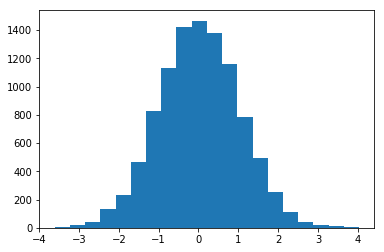

In [30]:
# 正态分布
x=np.random.randn(10000)
r=plt.hist(x,bins=20)

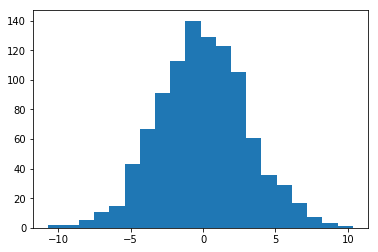

In [33]:
# 正态分布之和
x=np.random.randn(1000,10)
x=x.sum(axis=1)
r=plt.hist(x,bins=20)

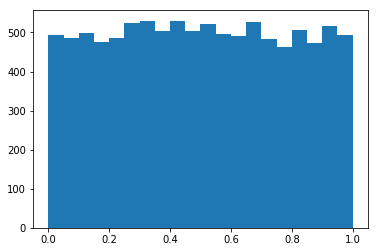

In [32]:
# 均匀分布
x=np.random.rand(10000)
r=plt.hist(x,bins=20)

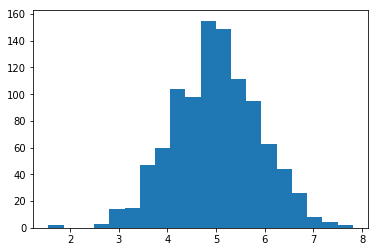

In [34]:
# 均匀分布之和
x=np.random.rand(1000,10)
x=x.sum(axis=1)
r=plt.hist(x,bins=20)